# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [52]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [53]:
mouse_df = pd.DataFrame(mouse_metadata)
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [54]:
study_df = pd.DataFrame(study_results)
study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [55]:
# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_df, study_df, on="Mouse ID", how="left")

# Display the data table for preview
print(combined_df.head())

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [56]:
# Checking the number of mice.

combined_df["Mouse ID"].nunique()

249

In [57]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicates_df = combined_df[combined_df.duplicated(subset = ["Mouse ID", "Timepoint"], keep=  False)]

duplicates_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [58]:
duplicates_df.count()

Mouse ID              10
Drug Regimen          10
Sex                   10
Age_months            10
Weight (g)            10
Timepoint             10
Tumor Volume (mm3)    10
Metastatic Sites      10
dtype: int64

In [59]:
duplicates_df["Mouse ID"].unique()

array(['g989'], dtype=object)

In [60]:
print(duplicates_df.columns)

print("-------------------")

print(combined_df.columns)


Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')
-------------------
Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')


In [61]:
all_duplicate_data_df = combined_df[combined_df["Mouse ID"] == "g989"]

all_duplicate_data_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [62]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = combined_df[combined_df["Mouse ID"] != "g989"]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [63]:
# Checking the number of mice in the clean DataFrame.

clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [64]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()

median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()

variance = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()

std_dev = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

SEM = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


print("Summary Statistics - Mean")
print()
print(mean)
print("-------------------")
print("Summary Statistics - Median")
print()
print(median)
print("-------------------")
print("Summary Statistics - Variance")
print()
print(variance)
print("-------------------")
print("Summary Statistics - Standard Deviation")
print()
print(std_dev)
print("-------------------")
print("Summary Statistics - SEM")
print()
print(SEM)

Summary Statistics - Mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64
-------------------
Summary Statistics - Median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64
-------------------
Summary Statistics - Variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64
-------------------
S

In [65]:
# Assemble the resulting series into a single summary DataFrame.

summary_statistics_df = pd.DataFrame(

    {"Mean Tumor Volume": mean,
     "Median Tumor Volume": median,
     "Tumor Volume Variance": variance,
     "Tumor Volume Std. Dev.": std_dev,
     "Tumor Volume Std. Err.": SEM}

)

# Display the summary statistics DataFrame

summary_statistics_df.head(10)


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [66]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_statistics_one_line = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

summary_statistics_one_line.head(10)


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [67]:
# Add a title to the summary statistics DataFrame and rename the columns.

summary_statistics_one_line.columns = ["Mean Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance", "Tumor Volume Std. Dev.", "Tumor Volume Std. Err."]
summary_statistics_one_line.head(10)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [68]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

mouse_id_timepoints = clean_df["Drug Regimen"].value_counts().sort_index()

mouse_id_timepoints

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: count, dtype: int64

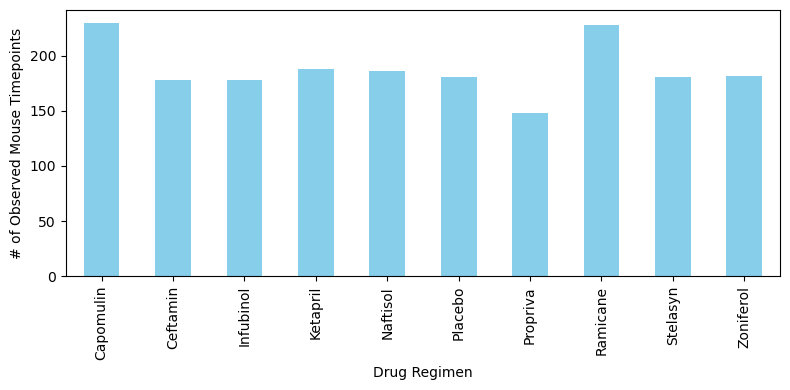

In [69]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

timepoint_plot_pandas = mouse_id_timepoints.plot(

    kind = "bar",
    figsize = (8, 4),
    color = "skyblue"
)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.tight_layout()
plt.show()

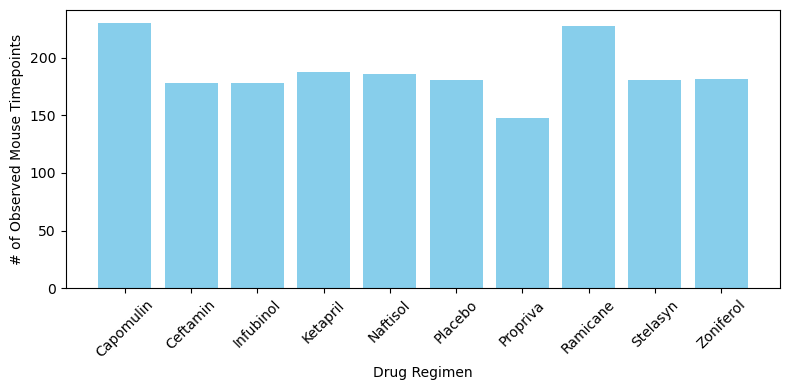

<Figure size 640x480 with 0 Axes>

In [70]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.figure(figsize = (8, 4))
plt.bar(
    mouse_id_timepoints.index, mouse_id_timepoints.values, 
    color = "skyblue",
    )

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

plt.savefig("Mice_Tumor_Study_Bar_Plot.png")

In [71]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender.
# Drop the duplicates.

unique_mice_df = clean_df.drop_duplicates(subset = ["Mouse ID"])

unique_mice_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


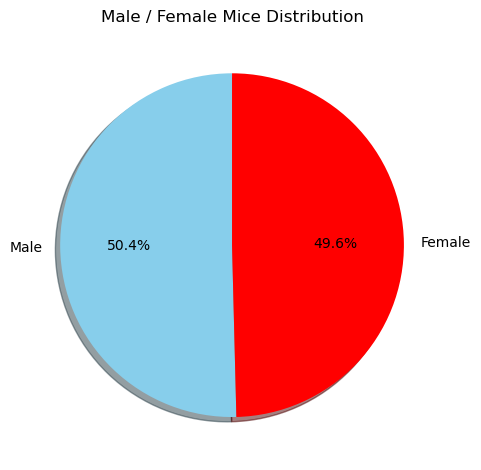

<Figure size 640x480 with 0 Axes>

In [72]:
# Make the pie chart

gender_counts = unique_mice_df["Sex"].value_counts()

gender_counts.plot.pie(
    startangle = 90,
    colors = ["skyblue", "red"],
    title = "Male / Female Mice Distribution",
    autopct = "%1.1f%%",
    shadow = True,
    legend = False,
    
)

plt.tight_layout()
plt.xlabel("")
plt.ylabel("")
plt.show()

plt.savefig("Gender_Distribution_Pie_Chart.png")

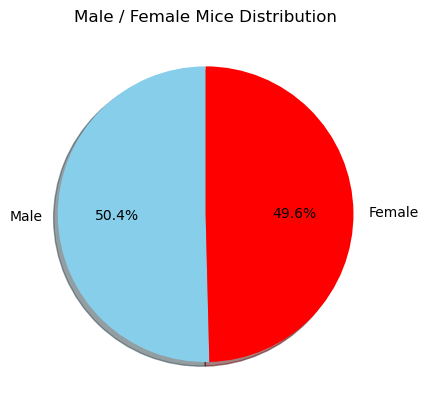

In [73]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart

plt.figure(figure = (8, 8))
plt.pie(
    gender_counts.values,
    labels = gender_counts.index, 
    startangle = 90,
    colors = ["skyblue", "red"],
    autopct = "%1.1f%%",
    shadow = True,
)

plt.title("Male / Female Mice Distribution")
plt.show()

## Quartiles, Outliers and Boxplots

In [74]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

greatest_timepoint_df = clean_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

final_df = pd.merge(greatest_timepoint_df, clean_df, on = ["Mouse ID", "Timepoint"], how = "left")
final_df.head(20)


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
5,a401,45,Zoniferol,Female,8,25,66.794156,4
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
8,a457,10,Ketapril,Female,11,30,49.783419,0
9,a492,45,Stelasyn,Male,20,25,60.122011,1


In [75]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

final_tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

for treatment in treatments:

    drug_data = final_df[final_df["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]

    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset

    final_tumor_volumes.append(drug_data)


    # Determine outliers using upper and lower bounds

    quartiles = drug_data.quantile([0.25, 0.5, 0.75])

    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]

    print(f"{treatment} IQR: {iqr}")
    print(f"{treatment} Outliers: {outliers.values}")


Capomulin IQR: 7.781863460000004
Capomulin Outliers: []
Ramicane IQR: 9.098536719999998
Ramicane Outliers: []
Infubinol IQR: 11.477135160000003
Infubinol Outliers: [36.3213458]
Ceftamin IQR: 15.577752179999997
Ceftamin Outliers: []


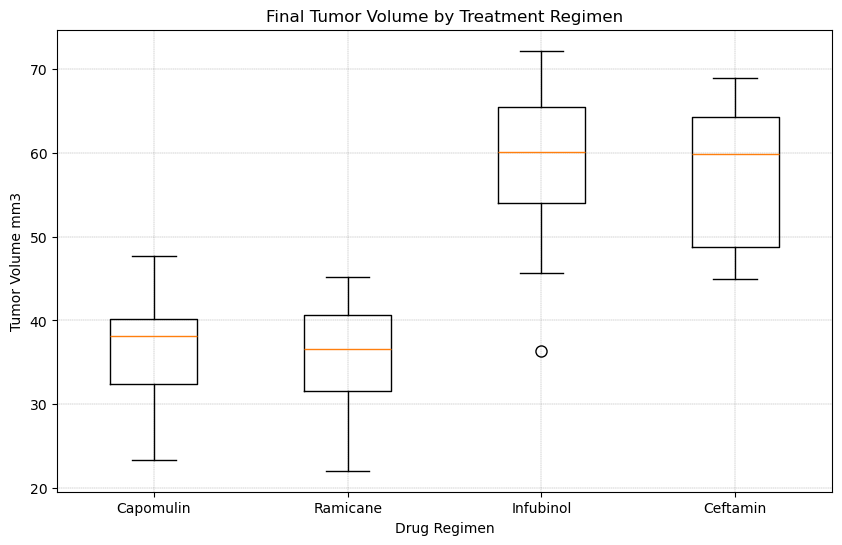

<Figure size 640x480 with 0 Axes>

In [76]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

plt.figure(figsize = (10, 6))
plt.boxplot(
    final_tumor_volumes, 
    tick_labels = treatments,
    flierprops = dict(
        marker = "o",
        color = "red",
        markersize = 8
    )
)

plt.title("Final Tumor Volume by Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume mm3")

plt.grid(True)
plt.grid(axis = "y")
plt.grid( color = "gray", linestyle = "--", linewidth = 0.25)

plt.show()

plt.savefig("Tumor_Volume_by_Regimen_BoxPlot.png")

## Line and Scatter Plots

In [77]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_data = clean_df[clean_df["Drug Regimen"] == "Capomulin"]

capomulin_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [78]:
mouse_id = capomulin_data["Mouse ID"].unique()[0]
mouse_id

's185'

In [79]:
single_mouse = capomulin_data[capomulin_data["Mouse ID"] == mouse_id]
single_mouse.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


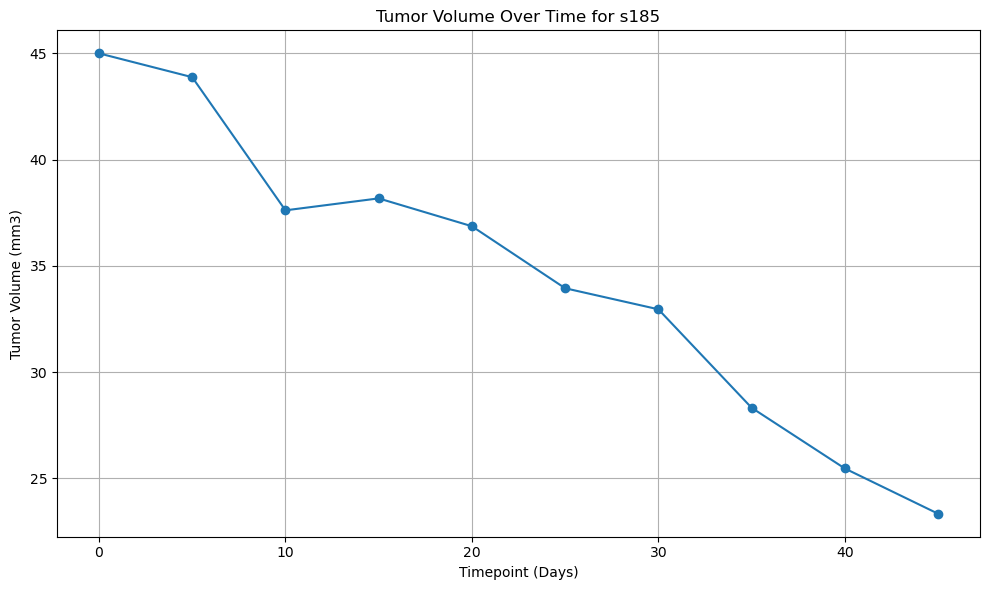

<Figure size 640x480 with 0 Axes>

In [80]:
plt.figure(figsize = (10, 6))
plt.plot(
    single_mouse["Timepoint"], single_mouse["Tumor Volume (mm3)"],
    marker = "o"
)

plt.title(f"Tumor Volume Over Time for {mouse_id}")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)
plt.tight_layout()

plt.show()

plt.savefig(f"Tumor_Volume_Over_Time for {mouse_id}.png")

In [81]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

avg_volume_and_weight = capomulin_data.groupby("Mouse ID").agg(
    {
        "Tumor Volume (mm3)": "mean",
        "Weight (g)": "mean"
    }
).reset_index()

avg_volume_and_weight.head(20)

,Mouse ID,Tumor Volume (mm3),Weight (g)
0,b128,41.963636,22.0
1,b742,40.083699,21.0
2,f966,36.505973,17.0
3,g288,41.990097,19.0
4,g316,44.613344,22.0
5,i557,44.805810,24.0
6,i738,39.141053,20.0
7,j119,44.465236,23.0
8,j246,43.216925,21.0
9,l509,44.434474,21.0


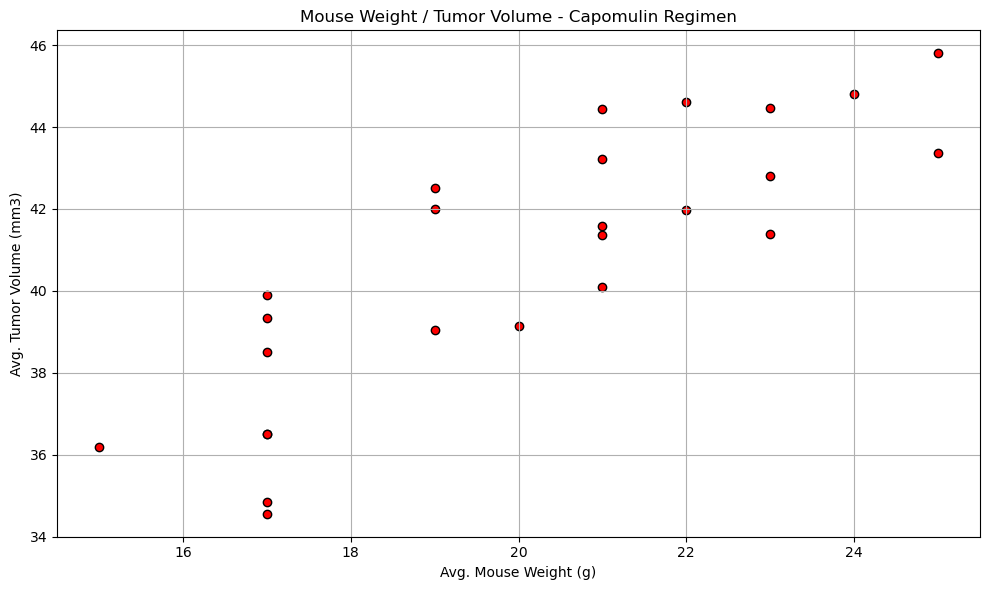

<Figure size 640x480 with 0 Axes>

In [82]:
plt.figure(figsize = (10, 6))

plt.scatter(
    avg_volume_and_weight["Weight (g)"],
    avg_volume_and_weight["Tumor Volume (mm3)"],
    marker = "o",
    color = "red",
    edgecolor = "black"
    )

plt.title("Mouse Weight / Tumor Volume - Capomulin Regimen")
plt.xlabel("Avg. Mouse Weight (g)")
plt.ylabel("Avg. Tumor Volume (mm3)")
plt.grid(True)
plt.tight_layout()

plt.show()

plt.savefig("mouse_weight_vs_tumor_volume.png", dpi = 300)

## Correlation and Regression

In [83]:
!pip install pearsonr

In [84]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import pearsonr
from scipy.stats import linregress

x = avg_volume_and_weight["Weight (g)"]
y = avg_volume_and_weight["Tumor Volume (mm3)"]

# Correlation Coefficient 

correlation, p_value = pearsonr(x, y)

print(f"Correlation Coefficient: {correlation:.2f}")
print(f"p-value: {p_value:.2f}")

Correlation Coefficient: 0.84
p-value: 0.00


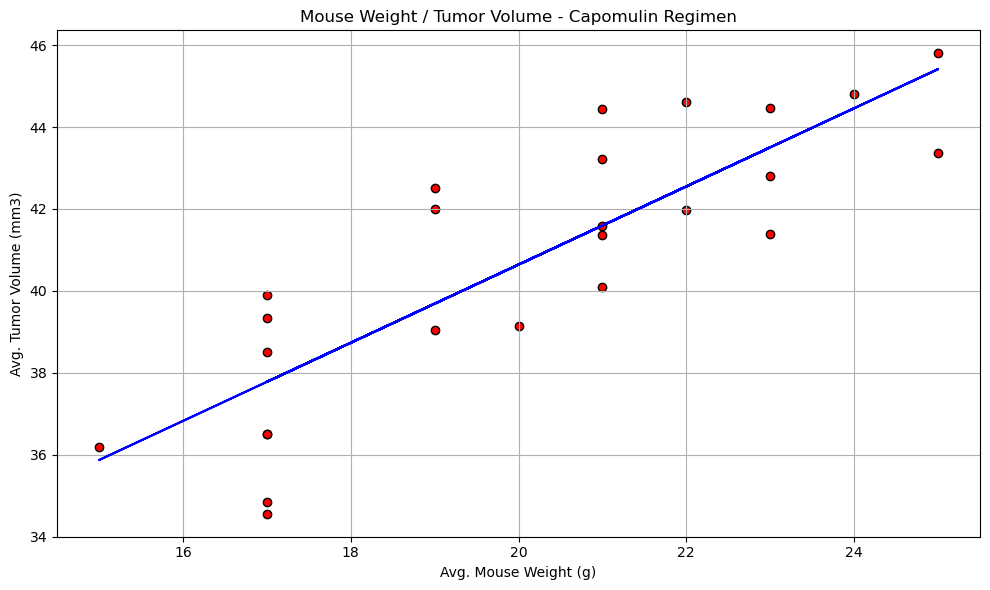

<Figure size 640x480 with 0 Axes>

In [85]:
# Linear Regression Model

slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Define regression line:

regression_line = slope*x + intercept

# Set up scatter Plot:

plt.figure(figsize=(10,6))
plt.scatter(
    x, y,
    color = "red",
    edgecolor = "black"
)

# Set up regression line:

plt.plot(
    x, regression_line,
    color = "blue",
)

plt.title("Mouse Weight / Tumor Volume - Capomulin Regimen")
plt.xlabel("Avg. Mouse Weight (g)")
plt.ylabel("Avg. Tumor Volume (mm3)")
plt.grid(True)
plt.tight_layout()

plt.show()

plt.savefig("Mouse_Weight_vs_Tumor_Volume_Correlation.png")